In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import string
import numpy as np
import random
from collections import Counter

In [2]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import sent_tokenize
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

# Can skip ahead if you're just dealing with nyt, breit, wapo test data

In [59]:
try:
    total_df = pd.read_pickle('total_df.p')
except:
    df_1 = pd.read_csv('articles1.csv')
    df_2 = pd.read_csv('articles2.csv')
    df_3 = pd.read_csv('articles3.csv')
    #print(df_1.head(1))
    print(df_1.shape)

    #print(df_1.publication.unique())
    #print(df_2.publication.unique())
    #print(df_3.publication.unique())
    #merge dataframes
    total_df = pd.concat([df_1, df_2, df_3])
    df_1 = 0
    df_2 = 0
    df_3 = 0
    total_df['sentence_count'] = 0
    total_df['word_count'] = 0
    total_df.to_pickle('total_df.p')
publication_names = total_df.publication.unique()

In [ ]:
total_df.publication.value_counts().plot(kind='bar')

In [ ]:
#print(list(total_df))
#print(total_df.loc[total_df['publication'] == 'New York Times']['title'])

In [66]:
#nyt_list = total_df.loc[total_df['publication'] == 'New York Times']['content'].tolist()
nyt_df = total_df.loc[total_df['publication'] == 'New York Times']
nyt_semic = nyt_df[nyt_df['content'].str.contains(";")]
#breit_list = total_df.loc[total_df['publication'] == 'Breitbart']['content'].tolist()
#wapo_list = total_df.loc[total_df['publication'] == 'Washington Post']['content'].tolist()

In [67]:
print(nyt_semic.shape)

(0, 12)


In [18]:
def rand_list(num_articles):
    return [random.random() for _ in range(num_articles)]

In [21]:
def get_id_content_list(pubname, num_articles):
    df_cont_list = total_df.loc[total_df['publication'] == pubname]['content'].tolist()
    df_id_list = total_df.loc[total_df['publication'] == pubname]['id'].tolist()
    num_articles_in_set = len(df_id_list)
    num_rand_to_get = num_articles_in_set if num_articles > num_articles_in_set else num_articles
    if num_articles > num_articles_in_set:
        print('Warning!', pubname, 'only has ', str(len(df_id_list)), ' articles, but you are asking for ', str(num_articles))
    random_num_list = rand_list(num_articles_in_set)
    cont_list = [i for ci,i in enumerate(df_cont_list) if random_num_list[ci] > 1-num_rand_to_get/num_articles_in_set]
    id_list =   [i for ci,i in enumerate(df_id_list)   if random_num_list[ci] > 1-num_rand_to_get/num_articles_in_set]
    return cont_list, id_list

In [23]:
num_articles = 3000

nyt_list, nyt_id = get_id_content_list('New York Times', num_articles)

breit_list, breit_id = get_id_content_list('Breitbart', num_articles)
wapo_list, wapo_id = get_id_content_list('Washington Post', num_articles)
print(len(nyt_list), len(breit_list), len(wapo_list))
print(nyt_list[0][:200], nyt_id[0])

3040 2990 3056
After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze 17284


In [43]:
def prepare_text(publication_content_list):
    if type(publication_content_list) is not list:
        publication_content_list = [publication_content_list]
    #lower case text
    lower_case = [text.strip().lower() for text in publication_content_list]
    #replace strange quote characters with normal ones 
    replace_quotes = [text.replace('“', '"').replace('”', '"') for text in lower_case]
    #do punkt sentence tokenization
    sentence_tokenize = [sent_detector.tokenize(text.strip()) for text in replace_quotes]
    #do nltk word tokenization
    word_tokenize = [nltk.word_tokenize(text) for text in replace_quotes]
    #get unique string counts
    string_counts = [Counter(text) for text in word_tokenize]
    return sentence_tokenize, word_tokenize, string_counts

In [25]:
nyt_sent, nyt_word, nyt_string_count = prepare_text(nyt_list)

In [26]:
breit_sent, breit_word, breit_string_count = prepare_text(breit_list)

In [27]:
wapo_sent, wapo_word, wapo_string_count = prepare_text(wapo_list)

In [28]:
pickle.dump( ['nyt', nyt_id, nyt_sent, nyt_word, nyt_string_count], open( "nyt_tokenized_strings.p", "wb" ) )
pickle.dump( ['breit', breit_id, breit_sent, breit_word, breit_string_count], open( "breit_tokenized_strings.p", "wb" ) )
pickle.dump( ['wapo', wapo_id, wapo_sent, wapo_word, wapo_string_count], open( "wapo_tokenized_strings.p", "wb" ) )

# ['breit', breit_sent, breit_word, breit_string_count],
# ['wapo', wapo_sent, wapo_word, wapo_string_count]]

# Can start here if you don't care about which articles you got, and you have the article pickle files

In [3]:
#unpickle files
pub, nyt_id, nyt_sent, nyt_word, nyt_string_count = pickle.load( open( "nyt_tokenized_strings.p", "rb" ) )
pub, breit_id, breit_sent, breit_word, breit_string_count = pickle.load( open( "breit_tokenized_strings.p", "rb" ) )
pub, wapo_id, wapo_sent, wapo_word, wapo_string_count = pickle.load( open( "wapo_tokenized_strings.p", "rb" ) )

In [68]:
translator = str.maketrans('', '', string.punctuation + '”“')
print(string.punctuation)
punctuation_set = set(string.punctuation + )

class Publication():
    
    def __init__(self, pub_id = '', pub_id_list = [], pub_sent = [], pub_word = [], pub_string_count = []):
        self.publication = pub_id
        self.id_list = pub_id_list
        self.sent_tok = pub_sent
        self.word_tok = pub_word
        self.string_count = pub_string_count
    
    def calc_word_count(self):
        self.word_count = [len(text) for text in self.word_tok]
        
    def calc_sent_count(self):
        self.sent_count = [len(text) for text in self.sent_tok]
        
    def calc_sent_len(self):
        if not self.word_count:
            self.calc_word_count()
        if not self.sent_count:
            self.calc_sent_count
        self.sent_len = [i/j for i,j in zip(self.word_count, self.sent_count)]
        
    def calc_unique_words(self):
        self.unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in self.word_tok]
        self.unique_word_frac = [float(i/j) for i,j in zip(self.unique_wc, self.word_count)]

    def calc_word_length(self):
        self.word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in self.word_tok]

    def calc_sent_len_std(self):
        self.sent_len_std = [np.std([len(sent) for sent in text]) for text in self.sent_tok]
        
    def calc_cps(self):
        if not self.sent_count:
            self.calc_sent_count()
        self.cps = [counter[',']/sent_num for counter, sent_num in zip(self.string_count, self.sent_count)]

    


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# New York Times

In [71]:
nyt = Publication("New York Times", nyt_id, nyt_sent, nyt_word, nyt_string_count)
nyt.calc_word_count()
nyt.calc_sent_count()
nyt.calc_sent_len()
nyt.calc_unique_words()
nyt.calc_word_length()
nyt.calc_sent_len_std()
nyt.calc_cps()
#for i in [nyt]:
#    print(i.word_count)
#print([i - j for i,j in zip(nyt_wc, nyt.word_count)])
#breit_wc = [len(text) for text in breit_word]
#wapo_wc = [len(text) for text in wapo_word]

# Breitbart

In [77]:
breit = Publication("Breitbart", breit_id, breit_sent, breit_word, breit_string_count)
breit.calc_word_count()
breit.calc_sent_count()
breit.calc_sent_len()
breit.calc_unique_words()
breit.calc_word_length()
breit.calc_sent_len_std()
breit.calc_cps()

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


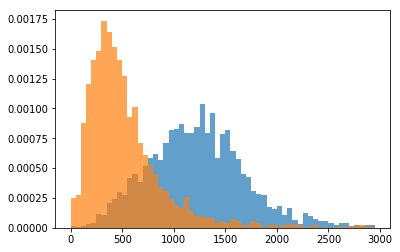

In [78]:
for i in [nyt, breit]:
    plt.hist(i.word_count, bins = list(range(0,3000,50)), normed = True, alpha = 0.7)

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Word count')

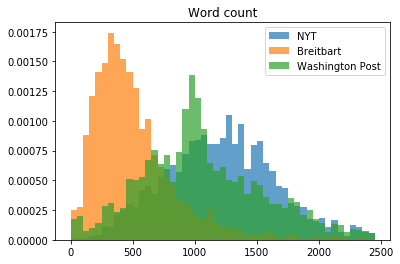

In [63]:
plt.hist(nyt_wc, bins = list(range(0,2500,50)),   normed = True, alpha = 0.7)
plt.hist(breit_wc, bins = list(range(0,2500,50)), normed = True, alpha = 0.7)
plt.hist(wapo_wc, bins = list(range(0,2500,50)),  normed = True, alpha = 0.7)
plt.legend(labels = ['NYT', 'Breitbart', 'Washington Post'])
plt.title("Word count")

# Sentence Count

In [22]:
#nyt_sent_count = [len(text) for text in nyt_sent]   #len([word for word in text if word not in punctuation_set]) for text in ....
#nyt.calc_sent_count()
#print([i-j for i,j in zip(nyt_sent_count, nyt.sent_count)])
#breit_sent_count = [len(text) for text in breit_sent]
#wapo_sent_count = [len(text) for text in wapo_sent]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.75989446e-03, 2.90237467e-03, 6.06860158e-03, 8.44327177e-03,
        1.36543536e-02, 1.51055409e-02, 1.53034301e-02, 1.91292876e-02,
        1.84696570e-02, 1.76781003e-02, 1.43799472e-02, 1.25329815e-02,
        1.00923483e-02, 8.44327177e-03, 6.59630607e-03, 6.53034301e-03,
        4.22163588e-03, 2.63852243e-03, 2.04485488e-03, 1.71503958e-03,
        2.17678100e-03, 4.61741425e-04, 9.23482850e-04, 9.23482850e-04,
        8.57519789e-04, 5.27704485e-04, 8.57519789e-04, 2.63852243e-04,
        2.63852243e-04, 3.95778364e-04, 2.63852243e-04, 2.63852243e-04,
        2.63852243e-04, 1.31926121e-04, 2.63852243e-04, 6.59630607e-05,
        1.31926121e-04, 6.59630607e-05, 1.31926121e-04, 0.00000000e+00,
        1.97889182e-04, 2.63852243e-04, 6.59630607e-05, 0.00000000e+00,
        1.31926121e-04, 6.59630607e-05, 6.59630607e-05, 1.31926121e-04,
        1.31926121e-04]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,

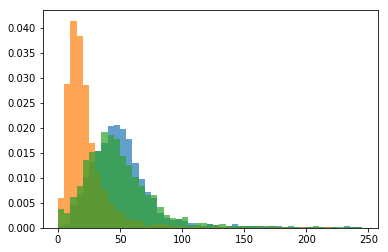

In [7]:
plt.hist(nyt_sent_count,   bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.hist(breit_sent_count, bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.hist(wapo_sent_count,  bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.legend(labels = ['NYT', 'Breitbart', 'Washington Post'])
plt.title("Sentence count")

# Sentence Length

In [52]:
#nyt_sent_len = [i/j for i,j in zip(nyt_wc, nyt_sent_count)]
#nyt.calc_sent_len()
#print([i-j for i,j in zip(nyt.sent_len, nyt_sent_len)])
#breit_sent_len = [i/j for i,j in zip(breit_wc, breit_sent_count)]
#wapo_sent_len = [i/j for i,j in zip(wapo_wc, wapo_sent_count)]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Sentence length')

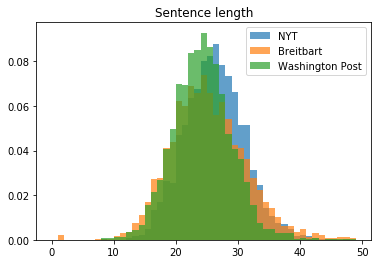

In [62]:
plt.hist(nyt_sent_len,   bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.hist(breit_sent_len, bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.hist(wapo_sent_len,  bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.legend(labels = ['NYT', 'Breitbart', 'Washington Post'])
plt.title("Sentence length")

# Unique Word Count and Fraction

In [10]:
#translator = str.maketrans('', '', string.punctuation + '”“')
#print(string.punctuation)
#punctuation_set = set(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [37]:
#nyt_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in nyt_word]
#nyt_unique_wc_old = [len(set(text.lower().translate(translator).split())) for text in nyt_list]
#print(nyt_unique_wc[:10], nyt_unique_wc_old[:10])
#breit_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in breit_word]
#wapo_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in wapo_word]

#print([i-j for i,j in zip(nyt_unique_wc, nyt.unique_wc)])

#breit_unique_wc = [len(set(text.lower().translate(translator).split())) for text in breit_list]
#wapo_unique_wc = [len(set(text.lower().translate(translator).split())) for text in wapo_list]

In [41]:
#nyt_unique_word_frac = [float(i/j) for i,j in zip(nyt_unique_wc, nyt_wc)]
#breit_unique_word_frac = [float(i/j) for i,j in zip(breit_unique_wc, breit_wc)]
#wapo_unique_word_frac = [float(i/j) for i,j in zip(wapo_unique_wc, wapo_wc)]

#print([[i-j, j] for i,j in zip(nyt_unique_word_frac, nyt.unique_word_frac)])

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Unique word fraction')

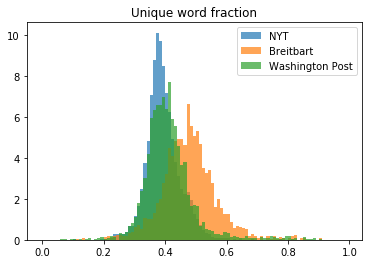

In [60]:
plt.hist(nyt_unique_word_frac,   bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha=0.7)
plt.hist(breit_unique_word_frac, bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)
plt.hist(wapo_unique_word_frac,  bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)
plt.legend(labels = ['NYT', 'Breitbart', 'Washington Post'])
plt.title("Unique word fraction")

# Mean word length

In [53]:
#nyt_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in nyt_word]
#breit_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in breit_word]
#wapo_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in wapo_word]
#print([i-j for i,j in zip(nyt_word_len, nyt.word_len)])

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0065445 , 0.0065445 , 0.01308901, 0.01963351,
        0.0065445 , 0.05235602, 0.05890052, 0.07198953, 0.10471204,
        0.09162304, 0.20942408, 0.32068063, 0.34685864, 0.41230366,
        0.62827225, 0.69371728, 0.79842932, 0.9947644 , 1.34162304,
        1.34162304, 1.66884817, 1.77356021, 1.68193717, 1.38743455,
        1.31544503, 1.23036649, 0.95549738, 0.64790576, 0.64136126,
        0.32722513, 0.28795812, 0.19633508, 0.09816754, 0.06544503,
        0.03272251, 0.01963351, 0.02617801, 0.0065445 , 0.03272251,
        0.01963351, 0.0065445 , 0.01308901, 0.0065445 , 0.0065445 ,
        0.        , 0.0065445 , 0.        , 0.0065445 , 0.        ,
        0.0065445 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0065445 , 0.0065445 , 0.        , 0.  

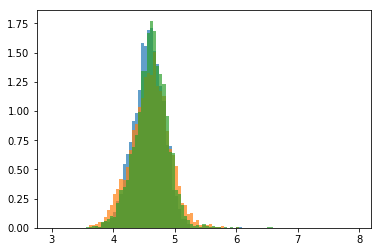

In [15]:
plt.hist(nyt_word_len,   bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha=0.7)
plt.hist(breit_word_len, bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha = 0.7)
plt.hist(wapo_word_len,  bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha = 0.7)

# Sentence length distribution

In [66]:
#nyt_sent_len_std = [np.std([len(sent) for sent in text]) for text in nyt_sent]
#breit_sent_len_std = [np.std([len(sent) for sent in text]) for text in breit_sent]
#wapo_sent_len_std = [np.std([len(sent) for sent in text]) for text in wapo_sent]
#print([i-j for i,j in zip(nyt_sent_len_std, nyt.sent_len_std)])

In [67]:
#print([len(sent) for sent in nyt_sent[0]],nyt_sent_len_std[:10])

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.0019685 , 0.00016404, 0.        , 0.00032808, 0.        ,
        0.00016404, 0.00032808, 0.00016404, 0.00016404, 0.        ,
        0.        , 0.00016404, 0.        , 0.00016404, 0.00016404,
        0.00016404, 0.00114829, 0.00032808, 0.00098425, 0.00164042,
        0.00360892, 0.00328084, 0.00410105, 0.00574147, 0.00524934,
        0.00770997, 0.01213911, 0.01312336, 0.01689633, 0.02099738,
        0.0214895 , 0.02542651, 0.02345801, 0.02870735, 0.03248031,
        0.02559055, 0.02952756, 0.0265748 , 0.02378609, 0.02526247,
        0.02296588, 0.01755249, 0.01541995, 0.01246719, 0.01295932,
        0.00951444, 0.00738189, 0.00787402, 0.00492126, 0.00410105,
        0.00180446, 0.00492126, 0.00213255, 0.00262467, 0.0019685 ,
        0.00180446, 0.00032808, 0.00065617, 0.00082021, 0.00098425,
        0.        , 0.        , 0.00032808, 0.        , 0.00016404,
        0.00032808, 0.00032808, 0.        , 0.00032808, 0.00016404,
        0.00016404, 0.        , 0.00016404, 0.  

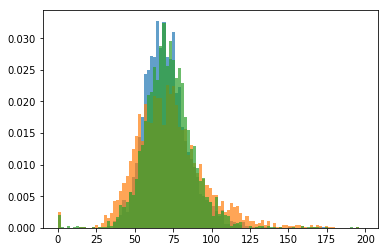

In [18]:
plt.hist(nyt_sent_len_std,   bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha=0.7)
plt.hist(breit_sent_len_std, bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha = 0.7)
plt.hist(wapo_sent_len_std,  bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha = 0.7)

# Commas per sentence

In [73]:
#nyt_cps = [counter[',']/sent_num for counter, sent_num in zip(nyt_string_count, nyt_sent_count)]
#breit_cps = [counter[',']/sent_num for counter, sent_num in zip(breit_string_count, breit_sent_count)]
#wapo_cps = [counter[',']/sent_num for counter, sent_num in zip(wapo_string_count, wapo_sent_count)]
#print([i-j for i,j in zip(nyt_cps, nyt.cps)])

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Commas per sentence')

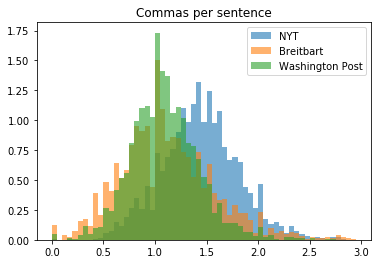

In [59]:
plt.hist(nyt_cps,   bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.6)
plt.hist(breit_cps, bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.6)
plt.hist(wapo_cps,  bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.6)
plt.legend(labels = ['NYT', 'Breitbart', 'Washington Post'])
plt.title("Commas per sentence")

# semicolons per sentence

In [22]:
#print( nyt_sent[0])
nyt_semic_ps = [float(counter['"']/sent_num) for counter, sent_num in zip(nyt_string_count, nyt_sent_count)]
breit_semic_ps = [float(counter['"']/sent_num) for counter, sent_num in zip(breit_string_count, breit_sent_count)]
wapo_semic_ps = [float(counter['"']/sent_num) for counter, sent_num in zip(wapo_string_count, wapo_sent_count)]
print(np.mean(nyt_semic_ps), np.mean(breit_semic_ps), np.mean(wapo_semic_ps))
#print(nyt_semic_ps[:1000])

0.0 0.0 0.0


/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
        0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
        0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
        0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
        0.09 , 0.092, 0.094, 0.096, 0.098]),
 <a list of 49 Patch objects>)

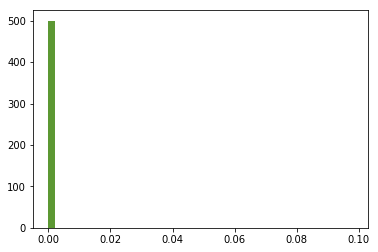

In [23]:
plt.hist(nyt_semic_ps,   bins = [i/500. for i in list(range(0,50,1))], normed = True, alpha = 0.7)
plt.hist(breit_semic_ps, bins = [i/500. for i in list(range(0,50,1))], normed = True, alpha = 0.7)
plt.hist(wapo_semic_ps,  bins = [i/500. for i in list(range(0,50,1))], normed = True, alpha = 0.7)

# compare given article to mean values of publications

In [138]:
def compare_article(text_features):
    wc_mean = [np.mean(nyt_wc), np.mean(breit_wc), np.mean(wapo_wc)]
    sent_len_mean = [np.mean(nyt_sent_len), np.mean(breit_sent_len), np.mean(wapo_sent_len)]
    sent_len_std_mean = [np.mean(nyt_sent_len_std), np.mean(breit_sent_len_std), np.mean(wapo_sent_len_std)]
    unique_word_frac_mean = [np.mean(nyt_unique_word_frac), np.mean(breit_unique_word_frac), np.mean(wapo_unique_word_frac)]
    word_len_mean = [np.mean(nyt_word_len), np.mean(breit_word_len), np.mean(wapo_word_len)]
    cps_mean = [np.mean(nyt_cps), np.mean(breit_cps), np.mean(wapo_cps)]
    features = ['sentence length', 'sentence length distribution', 'unique word fraction', 'word length', 'commas per sentence']
    mean_features = [[i, j, k, l, m] for i, j, k, l, m in zip(sent_len_mean, sent_len_std_mean, unique_word_frac_mean, word_len_mean, cps_mean)]
    print(mean_features)
    pickle.dump(mean_features, open('mean_features.p', 'wb'))
    return [[float(i/j) for i,j in zip(text_features, pub_features)] for pub_features in mean_features]

In [99]:
def generate_features(text):
    sent_tok, word_tok, string_counts = prepare_text(text)
    sent_tok = sent_tok[0]
    word_tok = word_tok[0]
    string_counts = string_counts[0]
    
    punctuation_set = set(string.punctuation)
    word_count = len([word for word in word_tok if word not in punctuation_set])
    sent_count = len(sent_tok)
    sent_len = float(word_count / sent_count)
    sent_std = np.std([len(sent) for sent in sent_tok])

    unique_word_count = len(set([word for word in word_tok if word not in punctuation_set]))
    unique_word_frac = float(unique_word_count / word_count)
    mean_word_length = np.mean([len(word) for word in word_tok if word not in punctuation_set])

    cps = string_counts[',']/sent_count
    return [sent_len, sent_std, unique_word_frac, mean_word_length, cps]


[20.197183098591548, 69.01703931587748, 0.4302649930264993, 4.46652719665272, 1.3098591549295775]
[[26.312734925852087, 71.14091839782522, 0.3932280585672628, 4.568412788243869, 1.4453067284338383], [25.35519315101246, 74.23027062214763, 0.47902840537547725, 4.616356193633785, 1.1402077779191107], [24.386067322366973, 73.09051896151644, 0.4120775036811656, 4.6154456218211894, 1.1079407332000408]]


([<matplotlib.axis.XTick at 0x7f8f8e858dd8>,
 <a list of 5 Text xticklabel objects>)

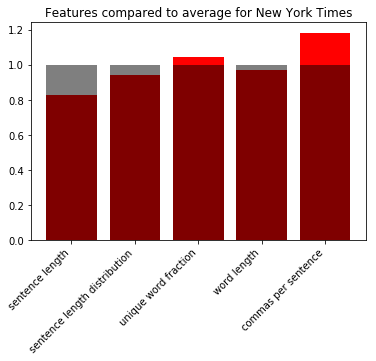

In [140]:
#print(' '.join(nyt_sent[0]))
features = generate_features([' '.join(nyt_sent[10])])
print(features)
features_compare_to_mean = compare_article(features)
features = ['sentence length', 'sentence length distribution', 'unique word fraction', 'word length', 'commas per sentence']
plt.title('Features compared to average for {}'.format("New York Times"))
plt.bar(list(range(5)), features_compare_to_mean[2], color = 'r')
plt.bar(list(range(5)), [1 for _ in range(5)], color = 'black', alpha = 0.5)
#plt.ylim((0,1.2))
plt.xticks(range(5), features, rotation = 45, ha = 'right')
#plt.bar(list(range(5)), features_compare_to_mean[1], alpha = 0.5)

#plt.bar(list(range(5)), features_compare_to_mean[2], alpha = 0.5)


### from sklearn import tree
#X = [[0, 0], [1, 1]]
#Y = [0, 1]
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

In [25]:
#join data
wc = nyt_wc + breit_wc + wapo_wc
sent_len = nyt_sent_len + breit_sent_len + wapo_sent_len
sent_len_std = nyt_sent_len_std + breit_sent_len_std + wapo_sent_len_std
unique_word_frac = nyt_unique_word_frac + breit_unique_word_frac + wapo_unique_word_frac
word_len = nyt_word_len + breit_word_len + wapo_word_len
cps = nyt_cps + breit_cps + wapo_cps
semic_ps = nyt_semic_ps + breit_semic_ps + wapo_semic_ps
#print(len(wc), len(word_length))

In [68]:
#combine features
X = [[i, j, k, l, m] for i, j, k, l, m in zip(sent_len, sent_len_std, unique_word_frac, word_len, cps)]

In [69]:
#labels
Y = [0 for i in range(len(nyt_wc))] + [1 for i in range(len(breit_wc))] + [2 for i in range(len(wapo_wc))]
print(len(Y))

9086


In [70]:
#test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:len(Y)], Y, test_size=0.6)

In [71]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':range(3,20)}
#clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
#clf.fit(X=X_train, y=y_train)
#tree_model = clf.best_estimator_
#print (clf.best_score_, clf.best_params_) 


#clf = tree.DecisionTreeClassifier(max_depth = 5)
#clf = clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [72]:
y_pred = clf.predict(X_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]

Normalized confusion matrix
[[0.68 0.14 0.18]
 [0.15 0.63 0.22]
 [0.26 0.24 0.5 ]]


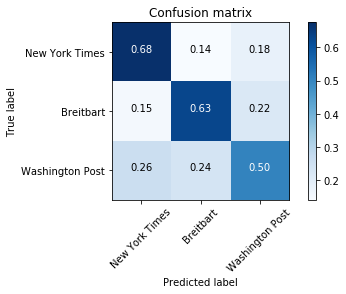

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['New York Times', 'Breitbart', 'Washington Post']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix', normalize = True)


[[1218.  333.  471.]
 [ 243. 1111.  482.]
 [ 364.  339.  891.]] 5452.0
Counter({2: 1844, 0: 1825, 1: 1783})


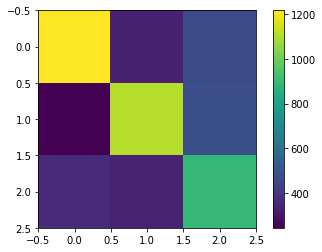

In [31]:
conf_mat = np.zeros((3,3))
for pred, true in zip(y_pred, y_test):
    conf_mat[pred,true] += 1.
#conf_mat[2,1] += 1000
#[y,x] format (first index (predicted) is on the vertical, second index (truth) is on the horizontal)
plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))
print(Counter(y_test))

In [32]:
from sklearn.externals import joblib
joblib.dump(clf, 'decision_tree_10.pkl') 

['decision_tree_10.pkl']

Feature ranking:
1. feature 2 (0.269717)
2. feature 4 (0.235243)
3. feature 1 (0.184715)
4. feature 0 (0.156361)
5. feature 3 (0.153964)
[2 4 1 0 3]


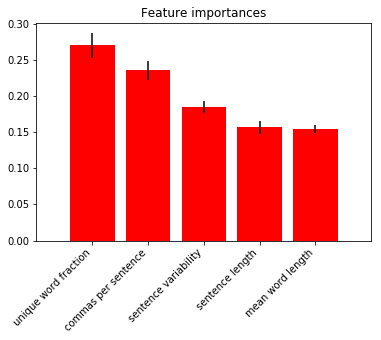

In [79]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[0])):#.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
feature_names = ['sentence length', 'sentence variability', 'unique word fraction', 'mean word length', 'commas per sentence']
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(X[0])), importances[indices],
       color="r", yerr=std[indices], align="center")
print(indices)
plt.xticks(range(len(X[0])), [feature_names[i] for i in indices], rotation = 45, ha = 'right')
plt.xlim([-1, len(X[0])])
plt.show()


In [176]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

[[0.25628141 0.24221106 0.        ]
 [0.26582915 0.23567839 0.        ]
 [0.         0.         0.        ]] 1.0000000000000127


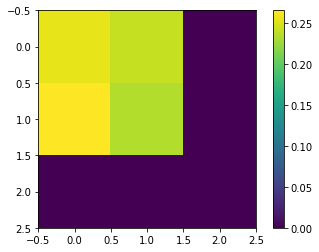

In [61]:
conf_mat = np.zeros((3,3))
for pred_chance, true in zip(chance, y_test):
    conf_mat[pred_chance,true] += 1./len(y_pred)

plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))

In [ ]:
total_df = 0

In [ ]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file='graph') 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

In [ ]:
print(wapo_collect[0])

In [ ]:
#get content column into list
article_list = total_df['content'].tolist()
print(article_list[:10])

In [ ]:
word_count_list = [len(text.split()) for text in article_list[:10000]]
print(word_count_list[:100])

In [ ]:
translator = str.maketrans('', '', string.punctuation)
unique_word_list = [set(text.lower().translate(translator).split()) for text in article_list[:10000]]
print(unique_word_list[:1])
#df.loc[row, column] = pd.DataFrame({'fake_key': list})

ADD WORDCOUNT COLUMN

In [ ]:
def word_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'word_count'] = total_df.loc[total_df['publication'] == pub_name, 'content'].str.split().str.len()
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

In [ ]:
word_count('Washington Post')
word_count('New York Times')
word_count('Vox')
word_count('Fox News')
#print(total_df.loc[total_df['publication'] == 'Washington Post']['word_count'].head(20))
#wapo_group['word_count'] = wapo_group['content'].str.split().str.len()
#print(wapo_group['word_count'].head(20))

In [ ]:
print(total_df.groupby('publication')['word_count'].describe())

ADD SENTENCE LENGTH COLUMN

In [ ]:
def sentence_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'sentence_count'] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(sent_detector.tokenize(row.strip())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
sentence_count('Washington Post')
sentence_count('New York Times')
sentence_count('Vox')
sentence_count('Fox News')
#sentence_count('')

In [ ]:
print(total_df.groupby('publication')['sentence_count'].describe())
#print(total_df.head(2))

In [ ]:
#plot word count vs sentence length
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','word_count'], total_df.loc[total_df['publication'] == 'New York Times','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','word_count'], total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','word_count'], total_df.loc[total_df['publication'] == 'Vox','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','word_count'], total_df.loc[total_df['publication'] == 'Fox News','sentence_count'])

plt.xlim((0,5000))

plt.ylim((0,200))
plt.show()

In [ ]:
#total_df['unique_word_count'] = 0

In [ ]:
def unique_word_count(pub_name):
    col_name = 'unique_word_count'
    total_df.loc[total_df['publication'] == pub_name, col_name] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(set(row.lower().split())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
#unique_word_count('New York Times')
#unique_word_count('Vox')
#unique_word_count('Washington Post')
unique_word_count('Fox News')
print(total_df.groupby('publication')['unique_word_count'].describe())

In [ ]:
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','sentence_count'], total_df.loc[total_df['publication'] == 'New York Times','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'], total_df.loc[total_df['publication'] == 'Washington Post','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','sentence_count'], total_df.loc[total_df['publication'] == 'Vox','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','sentence_count'], total_df.loc[total_df['publication'] == 'Fox News','unique_word_count'], s=4)

plt.xlim((0,200))

plt.ylim((0,1000))
plt.show()

In [ ]:
#sub_df_max_wordcount = sub_df
total_df.groupby('publication')['word_count'].hist(bins = 100, alpha = 0.5, normed = True)